# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd


In [2]:
# leer conjuntos de datos en los DataFrames
df_car_orders=pd.read_csv('/datasets/instacart_orders.csv', sep=';') #pedidos en la aplicación instacart
df_product=pd.read_csv('/datasets/products.csv',sep=';') #catálogo de productos
df_aisles=pd.read_csv('/datasets/aisles.csv',sep=';') #categoría de pasillo de víveres
df_departments=pd.read_csv('/datasets/departments.csv',sep=';') #categoría de departamento de víveres
df_order_product=pd.read_csv('/datasets/order_products.csv',sep=';') #ordenes de productos





In [3]:
# mostrar información del DataFrame

df_car_orders.info()
print(df_car_orders.head())


print(df_car_orders['days_since_prior_order'].value_counts(dropna=False).sort_index())

#llenar los valores nulos identificados en info()
#df_car_orders['days_since_prior_order'] = df_car_orders['days_since_prior_order'].fillna(0)

df_car_orders.info()


print('********Dataset duplicados :')
print(df_car_orders[df_car_orders.duplicated()])










<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

In [4]:
# mostrar información del DataFrame
df_product.info()
#print(df_product.head())

#identificar valores nulos
print("*****Agrupación y conteo de los nulos*****")
print(df_product['product_name'].value_counts(dropna=False).sort_index())

#llenar los valores nulos identificados en info()
#df_product['product_name'] = df_product['product_name'].fillna(" ")

df_car_orders.info()

print('*******Dataset duplicados :*****')
print(df_product[df_product.duplicated()])







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
*****Agrupación y conteo de los nulos*****
#2 Coffee Filters                                               1
#2 Cone White Coffee Filters                                    1
#2 Mechanical Pencils                                           1
#4 Natural Brown Coffee Filters                                 1
& Go! Hazelnut Spread + Pretzel Sticks                          1
                                                             ... 
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum       1
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum          1
with a Splash

In [5]:
# mostrar información del DataFrame
df_aisles.info()
print (df_aisles.head)

print('*******Dataset duplicados :*****')
print(df_aisles[df_aisles.duplicated()])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
<bound method NDFrame.head of      aisle_id                       aisle
0           1       prepared soups salads
1           2           specialty cheeses
2           3         energy granola bars
3           4               instant foods
4           5  marinades meat preparation
..        ...                         ...
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

[134 rows x 2 columns]>
*******Dataset duplicados :*****
Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [6]:
# mostrar información del DataFrame
df_departments.info()
print (df_departments)

print('*******Dataset duplicados :*****')
print(df_departments[df_departments.duplicated()])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18    

In [7]:
# mostrar información del DataFrame
df_order_product=pd.read_csv('/datasets/order_products.csv',sep=';') #ordenes de productos
df_order_product.info()
print(df_order_product.head())

print("*****Agrupación y conteo de los nulos*****")
print(df_order_product['order_id'].value_counts(dropna=False).sort_index())
print(df_order_product['product_id'].value_counts(dropna=False).sort_index())
print(df_order_product['add_to_cart_order'].value_counts(dropna=False).sort_index())
print(df_order_product['reordered'].value_counts(dropna=False).sort_index())


print('*******Dataset duplicados :*****')
print(df_order_product[df_order_product.duplicated()])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
*****Agrupación y conteo de los nulos*****
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: order_id, Length: 450046, dtype: int64
1        280
2         11
3         42
4         49
7          2
        ... 


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Los siguientes dataframes tienen valores nulos:
df_car_orders[day_sinces_prior_order]=28819 reg nulos
df_order_product[product_name] =1258 reg nulos

df_order[]= en este data frame no entiendo porque el data.info() no me indica el numero de nulos en la información.

Los siguientes DataFrames no tienen valores nulos (ausented) con el data.info:

df_departments no me marca nulos el data.info()
df_aisles no me marca nulos el data.info()


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(df_car_orders[df_car_orders['order_id'].duplicated()])

filtro= (df_car_orders.loc[df_car_orders['order_id']==794638])
                       
print( filtro)



        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

filtro= (df_car_orders.loc[(df_car_orders['order_dow']==3) & (df_car_orders['order_hour_of_day']==2) ])
                           
print(filtro[filtro['order_id'].duplicated()])


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

¿Qué sugiere este resultado? Hay registros duplicados en las transacciones del miercoles a las 2 pm y hay que eliminarlos

In [10]:
# Elimina los pedidos duplicados
df_car_orders=df_car_orders.drop_duplicates()
print(df_car_orders.duplicated())

#verificando los pedidos duplicados , si ya no hay
#filtro= (df_car_orders.loc[(df_car_orders['order_dow']==3) & (df_car_orders['order_hour_of_day']==2) ])                           
#print(filtro[filtro['order_id'].duplicated()])


0         False
1         False
2         False
3         False
4         False
          ...  
478962    False
478963    False
478964    False
478965    False
478966    False
Length: 478952, dtype: bool


In [11]:
# Vuelve a verificar si hay filas duplicadas
print(df_car_orders[df_car_orders.duplicated()])




Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
#df_car_orders.duplicated(subset=['order_id'])


print(df_car_orders[df_car_orders.duplicated(subset=['order_id'], keep=False)])



Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas

print(df_product[df_product.duplicated()])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados

print(df_product[df_product.duplicated(subset=['department_id'])])

print(df_product['department_id'].value_counts())


#df_product.info()



       product_id                                     product_name  aisle_id  \
4               5                        Green Chile Anytime Sauce         5   
6               7                   Pure Coconut Water With Orange        98   
7               8                Cut Russet Potatoes Steam N' Mash       116   
9              10   Sparkling Orange Juice & Prickly Pear Beverage       115   
10             11                                Peach Mango Juice        31   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
4               

In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
#print(df_product[df_product.duplicated(subset=['product_name'])])

df_product['product_name']=df_product['product_name'].str.upper()
print(df_product['product_name'].value_counts().sort_values(ascending=False))

#print(df_product['product_name'].unique())


GREEN TEA WITH GINSENG AND HONEY         3
CANDY BAR                                2
VITAMIN D3 1000 IU                       2
CREAM OF MUSHROOM SOUP                   2
MOZZARELLA STICKS WITH MARINARA SAUCE    2
                                        ..
TEMPT UNSWEETENED COCONUT HEMP MILK      1
ATLANTIC SALMON FILLETS                  1
AQUARIUM PUMP HAND SOAP                  1
KERATIN SMOOTH SHINE SERUM               1
COMPLETE OMEGA LEMON SOFTGELS            1
Name: product_name, Length: 48332, dtype: int64


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
print(df_product['product_name'].value_counts().sort_values(ascending=False))


GREEN TEA WITH GINSENG AND HONEY         3
CANDY BAR                                2
VITAMIN D3 1000 IU                       2
CREAM OF MUSHROOM SOUP                   2
MOZZARELLA STICKS WITH MARINARA SAUCE    2
                                        ..
TEMPT UNSWEETENED COCONUT HEMP MILK      1
ATLANTIC SALMON FILLETS                  1
AQUARIUM PUMP HAND SOAP                  1
KERATIN SMOOTH SHINE SERUM               1
COMPLETE OMEGA LEMON SOFTGELS            1
Name: product_name, Length: 48332, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos. Hay registros duplicados , pero si borro algunos hay el riesgo que el borrado exista en la tabla de ordenes y ya no ligue el producto.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print( df_departments[df_departments.duplicated()])

#df_depart.info()

Empty DataFrame
Columns: [department_id, department]
Index: []


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df_product['department_id'].value_counts().sort_values(ascending=False))



11    6564
19    6264
13    5372
7     4366
1     4008
16    3449
17    3085
15    2092
9     1858
4     1684
3     1516
20    1322
21    1258
6     1139
14    1117
18    1081
5     1054
8      972
12     907
2      548
10      38
Name: department_id, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos. El dataFrame de departamentos no tiene duplicados , en el segundo ejercicio solicita verificar los productos pero el dataframe no tiene columna de productos.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print( df_aisles[df_aisles.duplicated()])

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
#df_aisles.info()

print(df_aisles['aisle_id'].value_counts().sort_values(ascending=False))



1      1
17     1
4      1
5      1
6      1
      ..
130    1
131    1
132    1
133    1
134    1
Name: aisle_id, Length: 134, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos. No hay duplicados en aisles

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
#df_order_product.info()

print(df_order_product[df_order_product.duplicated()])

df_order_product.info()


Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(df_order_product['order_id'].value_counts())

61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
54659        1
210431       1
1717983      1
1136563      1
8196         1
Name: order_id, Length: 450046, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.R=Order products no se visualiza tiene filas duplicadas

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
df_product=pd.read_csv('/datasets/products.csv',sep=';') #catálogo de productos


# Encuentra los valores ausentes en la columna 'product_name'
df_product.info()
df_product100=df_product[df_product['product_name'].isna()]
print(df_product100)

#print(df_product.isna().sum())
#df_product['product_name'] = df_product['product_name'].fillna(" ")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664       

Describe brevemente cuáles son tus hallazgos. R= Hay 1258 reg. en product_name con valores ausentes.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
df_product100=df_product[df_product['product_name'].isna()]
print(df_product100)



       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos. R: Así es todos los ausentes son del pasillo (aisle )= 100

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
df_product100=df_product[df_product['product_name'].isna()]
print(df_product100)



       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos. R== Los productos que su product name es nulo tienen  aisle= 100 y department_id=21 

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
 
#df_aisles.info()

#print("****Productos con aisle=100")
#df_product100=df_product[df_product['aisle_id']==100]
#print(df_product100)

print("****Departamento con department_id=21")
df_depart21=df_departments[df_departments['department_id']==21 ]
print(df_depart21)

print("****Aisle=100")
df_aisle100=df_aisles[df_aisles['aisle_id']==100]
print(df_aisle100)




****Departamento con department_id=21
    department_id department
20             21    missing
****Aisle=100
    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos.R= probablemente los que esten en departamento Missing y pasillo Missing son productos no encontrados.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'


#llenar los valores nulos identificados en info()
df_product['product_name'] = df_product['product_name'].fillna("Unknown")

print(df_product['product_name'].unique())
print(" ")
print(" ")
print("*****Imprime los valores ausentes")
df_product100=df_product[df_product['product_name'].isna()]
print(df_product100)
print(" ")
print(" ")

print("*****Validando que no haya valores ausentes")
df_product.info()



['Chocolate Sandwich Cookies' 'All-Seasons Salt'
 'Robust Golden Unsweetened Oolong Tea' ...
 'ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR'
 'SPRING WATER BODY WASH' 'BURRITO- STEAK & CHEESE']
 
 
*****Imprime los valores ausentes
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []
 
 
*****Validando que no haya valores ausentes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Describe brevemente tus hallazgos y lo que hiciste con ellos. R= Los valores nulos identificados en la columna product_name se remplazaron con la cadena ="Unknown"

### `orders` data frame

In [28]:
# Encuentra los valores ausentes

#df_car_orders.info()
print(" ")
print(" ")
print("***Los valores ausentes en days_since_prior_order")
print(df_car_orders[df_car_orders['days_since_prior_order'].isna()])
print(" ")
print(" ")
print("Valores ausentes de toda la fila ")
print(df_car_orders[df_car_orders.isna()])
#df_car_orders['days_since_prior_order'] = df_car_orders['days_since_prior_order'].isna()

#llenar los valores nulos identificados en info()
#df_car_orders['days_since_prior_order'] = df_car_orders['days_since_prior_order'].fillna(0)


 
                       

 
 
***Los valores ausentes en days_since_prior_order
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96 

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?



df_ausente = df_car_orders[~(df_car_orders['order_number'] == 1) & (df_car_orders['days_since_prior_order'].isna())]
print(df_ausente)





Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos. R= Los valores ausentes se encuentran en el order_number=1 .

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
df_order_product.info()
print("")
print("**Valores ausentes por columna")
valores_ausentes_por_columna=df_order_product.isna().sum()
print (valores_ausentes_por_columna)
print("")




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

**Valores ausentes por columna
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64



In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

print("**Valor mínimo")
print(" ")
valor_min=df_order_product.min()
print(valor_min)
print("**Valor máximo")
print(" ")
valor_max=df_order_product.max()
print(valor_max)

**Valor mínimo
 
order_id             4.0
product_id           1.0
add_to_cart_order    1.0
reordered            0.0
dtype: float64
**Valor máximo
 
order_id             3421079.0
product_id             49694.0
add_to_cart_order         64.0
reordered                  1.0
dtype: float64


Describe brevemente cuáles son tus hallazgos. R= en add_to_cart_order el mínimo es 1 y el maximo es 64. Es en la única columna que me aparecen valores ausentes durante la revisión.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

print("**Pedidos que tienen un valor ausente en add_to_cart")
pedidos_con_ausentes=df_order_product[df_order_product['add_to_cart_order'].isna()]['order_id']
print (pedidos_con_ausentes)




**Pedidos que tienen un valor ausente en add_to_cart
737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


Describe brevemente cuáles son tus hallazgos. R= me muestra los pedidos que tienen un valor ausente en la orden

In [33]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_product.info()

df_order_product['add_to_cart_order'].fillna(999, inplace=True)

df_order_product['add_to_cart_order']=df_order_product['add_to_cart_order'].astype(int)

print("")
print("Convertida la columna de float a int")

df_order_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

Convertida la columna de float a int
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos. R= a los valores ausentes se les llenó con 999

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Son importantes los métodos isna(), fillna()
Filtrar dataframes
y data.info

para ir monitoreando los valores nulos y eliminarlos



# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [34]:
df_car_orders.info()

print (sorted(df_car_orders['order_hour_of_day'].unique()))

print("")
print("")
print("")



print (sorted(df_car_orders['order_dow'].unique()))

print("")
print("")
print("")



<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]



[0, 1, 2, 3, 4, 5, 6]





   order_hour_of_day  numbers_of_orders
0                  0               3180
1                  1               1763
2                  2                989
3                  3                770
4                  4                765


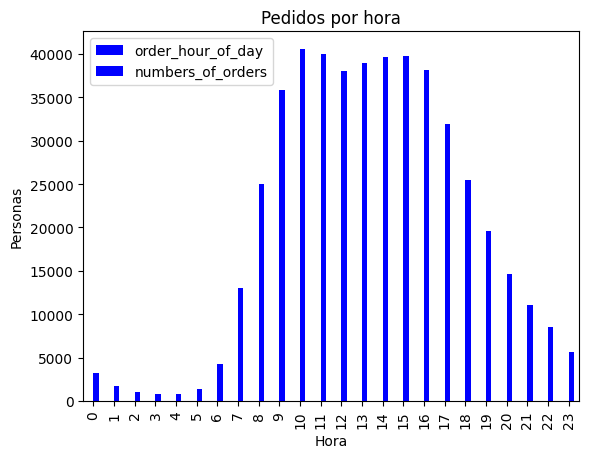

In [35]:
#Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
import matplotlib.pyplot as plt


#agrupación de la información, numero de personas que hacen pedidos en determinado hora del día.
data_orders =df_car_orders.groupby("order_hour_of_day")["order_id"].count().reset_index(name='numbers_of_orders')

print(data_orders.head(5))

data_orders.plot( kind= "bar", 
                 xlabel= "Hora", 
                 ylabel= "Personas", 
                 title= "Pedidos por hora",
                 color="blue") 


plt.show()


Escribe aquí tus conclusiones R=El horario donde más pedidos hacen

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

   order_hour_of_day  number_of_users
0                  0             2991
1                  1             1671
2                  2              958
3                  3              744
4                  4              735


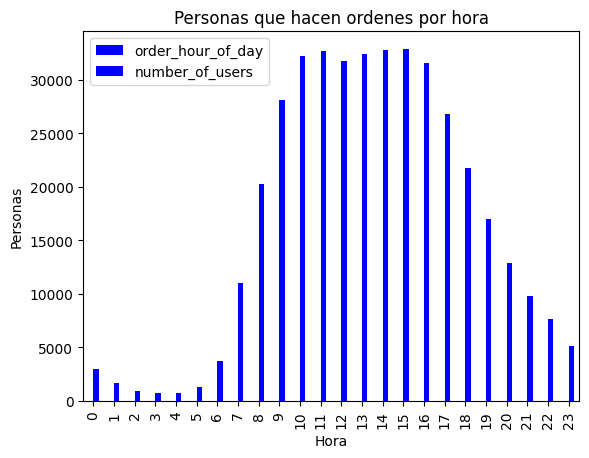

In [36]:
#Para cada hora del día, ¿cuántas personas hacen órdenes?
data_orders = df_car_orders.groupby("order_hour_of_day")['user_id'].nunique().reset_index(name='number_of_users')
#data_orders =df_car_orders.groupby("order_hour_of_day")['order_number']["user_id"].count().reset_index(name='numbers_of_orders')

print(data_orders.head(5))

data_orders.plot( kind= "bar", 
                 xlabel= "Hora", 
                 ylabel= "Personas", 
                 title= "Personas que hacen ordenes por hora",
                 color="blue") 


plt.show()


Escribe aquí tus conclusiones, R = Las horas con mayor consumo es de las 11 de las mañana a las 5 pm de la tarde.

### [A3] ¿Qué día de la semana compran víveres las personas?

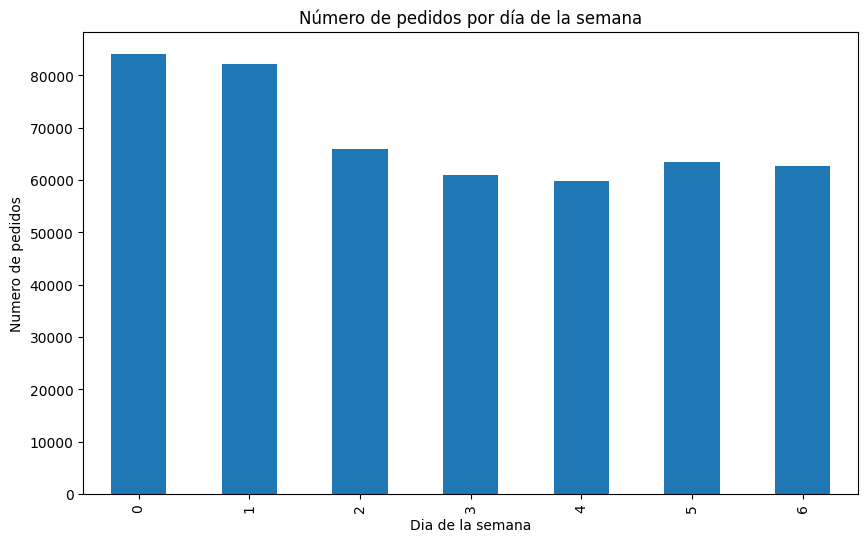

In [37]:
pedidos_por_dia=df_car_orders["order_dow"].value_counts().sort_index()

#crear el gráfico de barras
plt.figure(figsize=(10,6))
pedidos_por_dia.plot(kind="bar", title="Número de pedidos por día de la semana", xlabel="Dia de la semana", ylabel="Numero de pedidos") 

plt.show()

Los domingos y Lunes son los días que mas víveres compran. 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

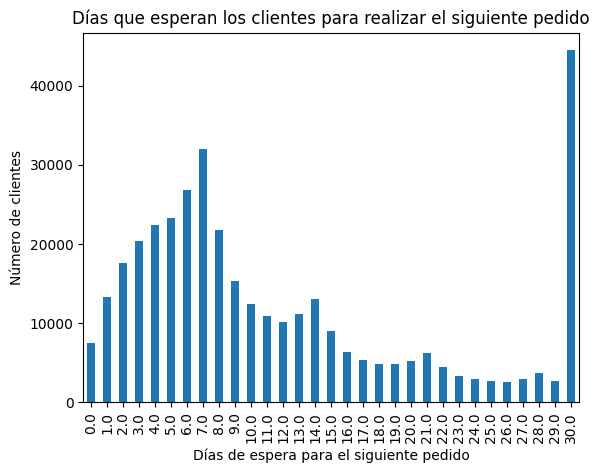

In [38]:
tiempo_prox_pedido = df_car_orders.groupby('days_since_prior_order')['user_id'].nunique()

# Crear el gráfico de barras
tiempo_prox_pedido.plot(kind='bar',
    xlabel='Días de espera para el siguiente pedido',
    ylabel='Número de clientes',
    title='Días que esperan los clientes para realizar el siguiente pedido')

# Mostrar el gráfico
plt.show()






Escribe aquí tus conclusiones R= La mayoría espera 30 días para realizar su siguiente pedido. ( mensual ) Y el que le sigue es semanal de 7 días o 6 .  Ya los siguientes rangos abarcan menos numero de personas 0 días como 800 personas, pudiera ser un restaurantero que necesita víveres todos los días para tener surtido su restaurante.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

                   Miércoles  Sábados
order_hour_of_day                    
0                        373      464
1                        215      254
2                        106      177
3                        101      125
4                        108      118
5                        170      161
6                        643      451
7                       1732     1619
8                       3125     3246
9                       4490     4311
10                      5026     4919
11                      5004     5116
12                      4688     5132
13                      4674     5323
14                      4774     5375
15                      5163     5188
16                      4976     5029
17                      4175     4295
18                      3463     3338
19                      2652     2610
20                      1917     1847
21                      1450     1473
22                      1154     1185
23                       718      893


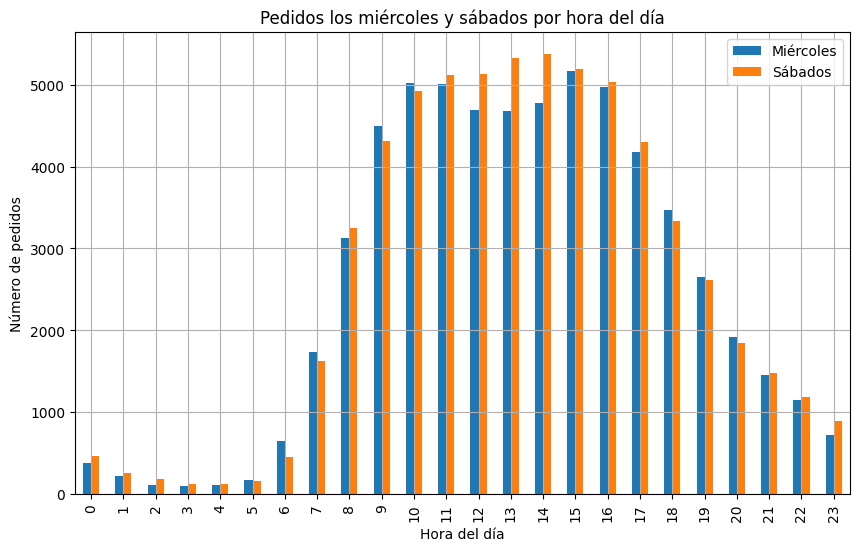

In [39]:


# Filtrar el DataFrame para incluir solo los pedidos realizados los miércoles y domingos
miercoles_orders = df_car_orders[df_car_orders['order_dow'] == 3]
sabado_orders = df_car_orders[df_car_orders['order_dow'] == 6]


# Agrupar por la hora del día y contar el número de pedidos para cada hora en los miércoles y domingos

pedidos_por_hora_miercoles = miercoles_orders.groupby('order_hour_of_day').size()
pedidos_por_hora_sabados = sabado_orders.groupby('order_hour_of_day').size()


# Unir los datos en un solo DataFrame
data = {'Miércoles': pedidos_por_hora_miercoles, 'Sábados': pedidos_por_hora_sabados}
df_combined = pd.DataFrame(data).fillna(0)  # Llenar con 0 si no hay pedidos el sábados
print(df_combined)

# Graficar el comportamiento de pedidos los miércoles y domingos por hora del día
df_combined.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.title('Pedidos los miércoles y sábados por hora del día')
plt.grid(True)
plt.show()

Escribe aquí tus conclusiones: Para ambos días las horas con mayor número de pedidos es entre 10 am 5 pm.


### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

user_id
2    2
4    2
5    1
6    2
7    2
dtype: int64
1    55357
2    36508
3    21547
4    13498
5     8777
dtype: int64


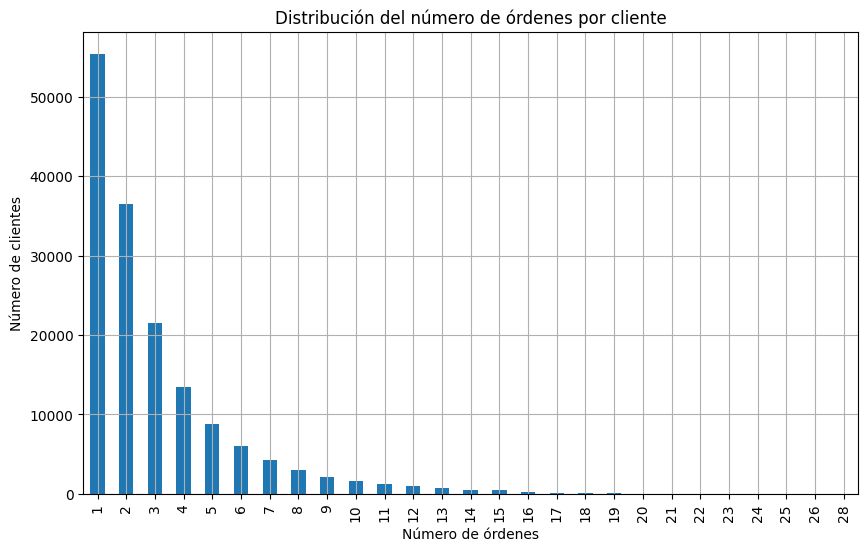

In [40]:
#2. Grafica la dis# Contar el número de órdenes por cliente
ordenes_por_cliente = df_car_orders.groupby('user_id').size()
print(ordenes_por_cliente.head(5))

# Contar el número de clientes que han realizado un determinado número de órdenes
distribucion_ordenes = ordenes_por_cliente.value_counts().sort_index()
print(distribucion_ordenes.head(5))

# Graficar la distribución del número de órdenes por cliente
distribucion_ordenes.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Número de órdenes')
plt.ylabel('Número de clientes')
plt.title('Distribución del número de órdenes por cliente')
plt.grid(True)
plt.show()

In [41]:
Hay 56,000 clientes que piden solo una orden.

SyntaxError: invalid syntax (1889976866.py, line 1)

Escribe aquí tus conclusiones

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [48]:
# Agrupar por el identificador y nombre del producto y contar la frecuencia de cada producto
merged_df = pd.merge(df_order_product, df_product, on='product_id', how='inner')
frecuencia_productos = merged_df.groupby(['product_id', 'product_name']).size()

#print(frecuencia_productos)

# Ordenar los resultados por frecuencia en orden descendente y tomar los primeros 20 productos
top_20_productos = frecuencia_productos.sort_values(ascending=False).head(20)

print(top_20_productos)

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
dtype: int64


Escribe aquí tus conclusiones

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

order_id
4     13
9     15
11     5
19     3
20     8
dtype: int64
1    21847
2    26292
3    29046
4    31054
5    31923
dtype: int64


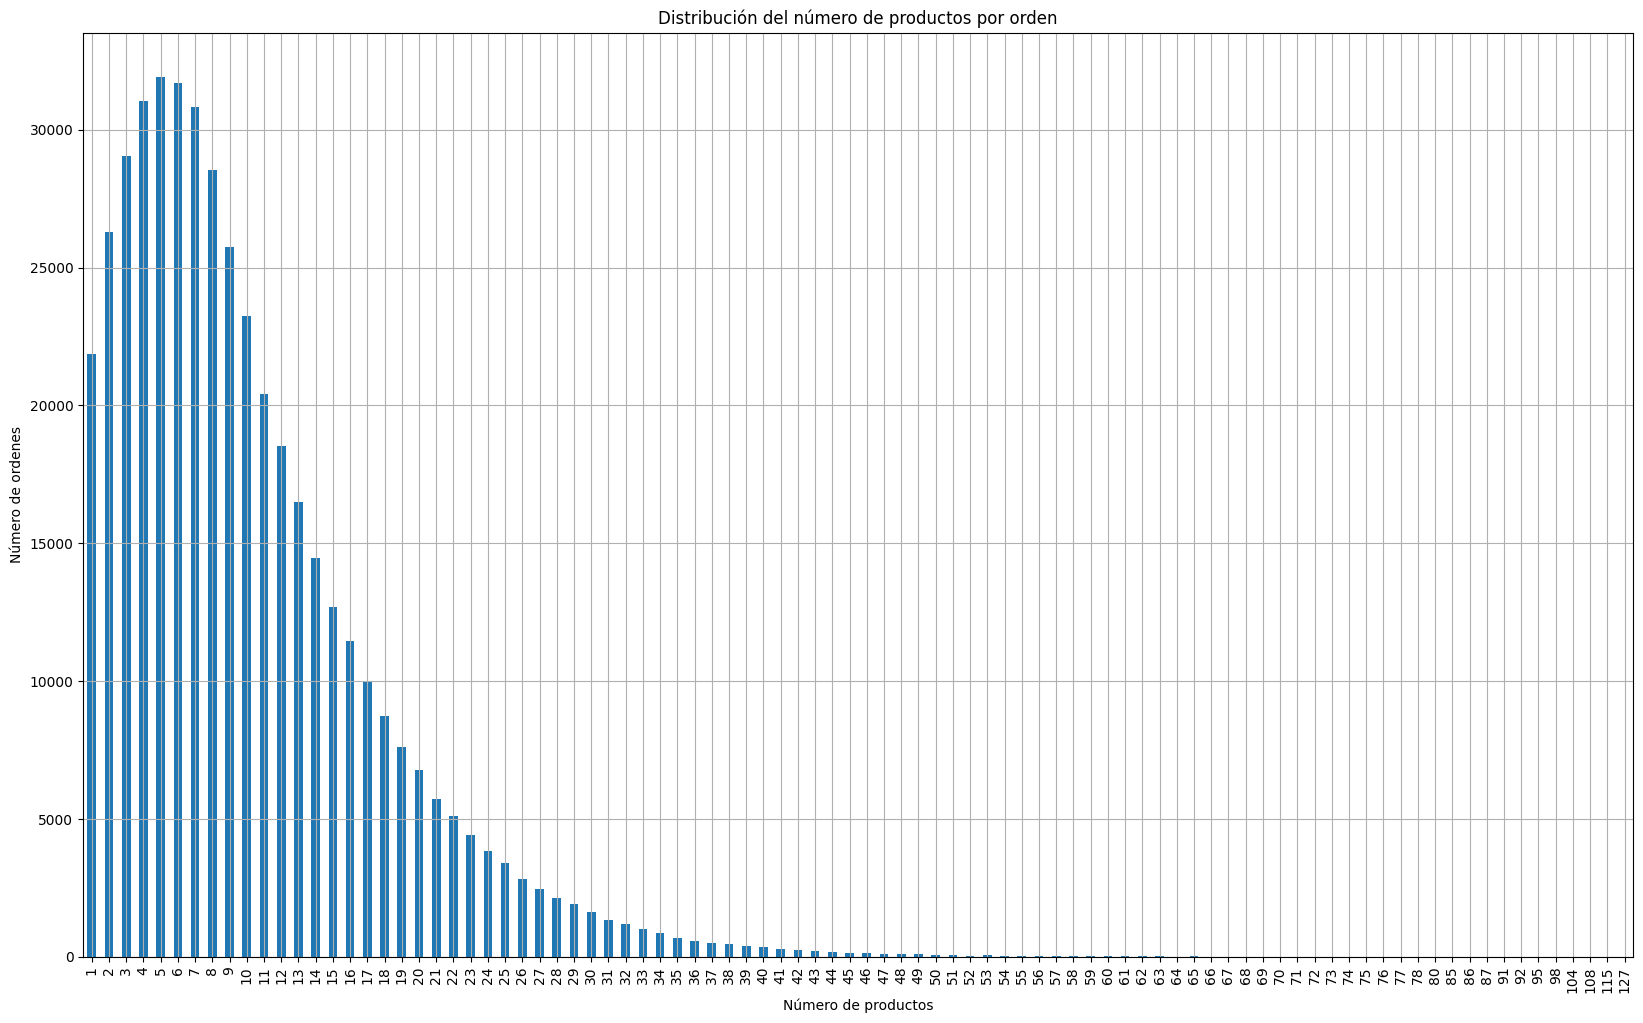

In [50]:
# Contar el número de productos por orden
productos_por_orden = df_order_product.groupby('order_id').size()
print(productos_por_orden.head(5))


distribucion_ordenesxprod = productos_por_orden.value_counts().sort_index()
print(distribucion_ordenesxprod.head(5))

# Graficar la distribución del número de órdenes por cliente
distribucion_ordenesxprod.plot(kind='bar', figsize=(20, 12))
plt.xlabel('Número de productos')
plt.ylabel('Número de ordenes')
plt.title('Distribución del número de productos por orden')
plt.grid(True)
plt.show()

Escribe aquí tus conclusiones : En su mayoría de 25,000 a 30,000 ordenes llevan de 4 a 10 productos en sus ordenes.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [51]:
# Agrupar por el identificador y nombre del producto y contar la frecuencia de cada producto
merged_df = pd.merge(df_order_product, df_product, on='product_id', how='inner')
frecuencia_productos = merged_df.groupby(['product_id', 'product_name']).size()

#print(frecuencia_productos)

# Ordenar los resultados por frecuencia en orden descendente y tomar los primeros 20 productos
top_20_productos = frecuencia_productos.sort_values(ascending=False).head(20)

print(top_20_productos)

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
dtype: int64


Escribe aquí tus conclusiones Este ejercicio esta repetido con la pregunta 7.7

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [47]:
# Contar la frecuencia de cada producto
frecuencia_productos = df_order_product['product_id'].value_counts()

# Contar la frecuencia de cada producto cuandot se vuelve a pedir
frecuencia_repedidos = df_order_product[df_order_product['reordered'] == 1]['product_id'].value_counts()

# Calcular la proporción de repeticiones para cada producto
proporcion_repedidos = (frecuencia_repedidos / frecuencia_productos).fillna(0)

print(proporcion_repedidos)

1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: product_id, Length: 45573, dtype: float64


Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [45]:
# Fusionar los DataFrames df_order_product y df_product para obtener el nombre de los productos
merged_order_product= pd.merge(df_order_product, df_product, on='product_id', how='inner')
#Fusionar los productos con las ordenes de productos
merged_df_cli = pd.merge(merged_order_product, df_car_orders, on='order_id', how='inner')

# Contar la frecuencia de cada producto por cliente
frecuencia_productos_cliente = merged_df_cli.groupby(['user_id', 'product_id']).size()

# Identificar los productos que un cliente ha vuelto a pedir
productos_repedidos_cliente = merged_df_cli[merged_df_cli['reordered'] == 1].groupby(['user_id', 'product_id']).size()

# Calcular la proporción de productos que un cliente ha vuelto a pedir de todos los productos que ha pedido
proporcion_productos_repedidos = productos_repedidos_cliente.div(frecuencia_productos_cliente, fill_value=0).groupby(['user_id']).mean()

print(proporcion_productos_repedidos)


user_id
2         0.020000
4         0.000000
5         0.666667
6         0.000000
7         0.923077
            ...   
206203    0.222222
206206    0.676471
206207    0.848485
206208    0.577083
206209    0.320000
Length: 149626, dtype: float64


In [ ]:
####Conclusiones , con el resultado se puede ver la preferencia del cliente a ciertos productos, entre más cercano a uno es que siempre lo está reordenando. 

In [ ]:
### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [46]:
#Fusionar los DataFrames df_order_product y df_product para obtener el nombre de los productos

merged_df = pd.merge(df_order_product, df_product, on='product_id', how='inner')

# Filtrar las filas donde el producto se agrega al carrito por primera vez

primeras_veces = merged_df[merged_df['add_to_cart_order'] == 1]
# Contar la frecuencia de cada producto que se agrega al carrito por primera vez

contar_productos = primeras_veces['product_name'].value_counts().head(20)
print(contar_productos)


Banana                         15562
Bag of Organic Bananas         11026
Organic Whole Milk              4363
Organic Strawberries            3946
Organic Hass Avocado            3390
Organic Baby Spinach            3336
Organic Avocado                 3044
Spring Water                    2336
Strawberries                    2308
Organic Raspberries             2024
Sparkling Water Grapefruit      1914
Organic Half & Half             1797
Large Lemon                     1737
Soda                            1733
Organic Reduced Fat Milk        1397
Limes                           1370
Hass Avocados                   1340
Organic Reduced Fat 2% Milk     1310
Half & Half                     1309
Organic Yellow Onion            1246
Name: product_name, dtype: int64


In [ ]:
La Bananana y la Bag organic banana son los víveres que tienen como prioridad para ingresarlos en el carrito y adicional es un producto con alto consumo de los clientes ( frecuente)

In [ ]:
#CONCLUSIONES DEL PROYECTO

En el proyecto se analiza el comportamiento de consumo de los clientes. Horarios y días pico.
Si el cliente tiene preferencia por algún producto y que tan frecuentemente lo solicita.
Los productos mayormente vendidos y preferidos por el cliente . 


En cuanto a lo técnico , el proyecto ya estuvo muy elevado. Yo si tuve que pedir apoyo a alguien cercano para poder resolverlo,
debido a la complejidad . 

Borré varias líneas de mi proyecto por accidente casi al final por eso las ultimas conclusiones pueden estar en otro formato.
Me falta el expertaise para Jupiter Notebook y pithon.

Algo adicional es que el tiempo que marca el contenido de estudio , muchas veces no se cumple, termina uno llevándose más tiempo.


